<a href="https://colab.research.google.com/github/kranov582/Machine-learning/blob/main/Penguin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM
from scipy.stats import shapiro

In [ ]:
# Carga do dataset

# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
file_path = "https://raw.githubusercontent.com/kranov582/Machine-learning/main/penguins_lter.csv"

# Lê o arquivo utilizando as colunas informadas
dataset = pd.read_csv(file_path, sep=',',encoding='ISO-8859-1')

dataset.head(10)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
5,PAL0708,6,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,11/16/07,39.3,20.6,190.0,3650.0,MALE,8.66496,-25.29805,NaN
6,PAL0708,7,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N4A1,No,11/15/07,38.9,17.8,181.0,3625.0,FEMALE,9.18718,-25.21799,Nest never observed with full clutch.
7,PAL0708,8,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N4A2,No,11/15/07,39.2,19.6,195.0,4675.0,MALE,9.46060,-24.89958,Nest never observed with full clutch.
8,PAL0708,9,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N5A1,Yes,11/9/07,34.1,18.1,193.0,3475.0,NaN,NaN,NaN,No blood sample obtained.
9,PAL0708,10,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N5A2,Yes,11/9/07,42.0,20.2,190.0,4250.0,NaN,9.13362,-25.09368,No blood sample obtained for sexing.


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [ ]:
dataset.describe(include = object)

,studyName,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Sex,Comments
count,344,344,344,344,344,344,344,344,334,26
unique,3,3,1,3,1,190,2,50,3,7
top,PAL0910,Adelie Penguin (Pygoscelis adeliae),Anvers,Biscoe,"Adult, 1 Egg Stage",N61A2,Yes,11/27/07,MALE,Nest never observed with full clutch.
freq,120,152,344,168,344,3,308,18,168,13


In [ ]:
penguin = dataset[['Culmen Length (mm)', 'Culmen Depth (mm)', 
                  'Flipper Length (mm)', 'Body Mass (g)', 'Island', 'Sex',
                  'Species' ]]
penguin.dropna(axis = 0, inplace = True)    
penguin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Culmen Length (mm)   334 non-null    float64
 1   Culmen Depth (mm)    334 non-null    float64
 2   Flipper Length (mm)  334 non-null    float64
 3   Body Mass (g)        334 non-null    float64
 4   Island               334 non-null    object 
 5   Sex                  334 non-null    object 
 6   Species              334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [ ]:
def transform_categorical_columns(dataset, target_column=None):
    # Verificar colunas com tipo categórico
    categorical_columns = dataset.select_dtypes(include=['object']).columns
    
    if len(categorical_columns) == 0:
        # Não há colunas categóricas, retornar o dataset original
        return dataset
    
    # Criar o codificador
    encoder = OneHotEncoder(drop='first', sparse=False)
    
    # Aplicar o dummy encoding nas colunas categóricas, exceto a coluna target
    columns_to_encode = categorical_columns.drop(target_column) if target_column else categorical_columns
    dummy = encoder.fit_transform(dataset[columns_to_encode])
    
    # Obter os nomes das novas colunas
    encoded_columns = encoder.get_feature_names_out(columns_to_encode)
    
    # Criar um DataFrame com as colunas transformadas
    encoded_data = pd.DataFrame(dummy, columns=encoded_columns, index=dataset.index)
    
    if target_column and target_column in categorical_columns:
        # Realizar transformação de label encoder na coluna target
        label_encoder = LabelEncoder()
        encoded_target = label_encoder.fit_transform(dataset[target_column])
        dataset[target_column] = encoded_target
    
    # Converter as novas colunas para o tipo inteiro
    encoded_data = encoded_data.astype(int)
    
    # Remover as colunas categóricas do dataset original, exceto a coluna target
    columns_to_drop = categorical_columns.drop(target_column) if target_column else categorical_columns
    dataset = dataset.drop(columns_to_drop, axis=1)
    
    # Concatenar as colunas originais com as colunas transformadas
    dataset = pd.concat([dataset, encoded_data], axis=1)

    target = dataset[target_column]

    dataset.drop(columns = f"{target_column}", inplace = True)
    dataset[target_column] = target

    return dataset

In [ ]:
datasetML = transform_categorical_columns(penguin, 'Species')

In [ ]:
datasetML

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Island_Dream,Island_Torgersen,Sex_FEMALE,Sex_MALE,Species
0,39.1,18.7,181.0,3750.0,0,1,0,1,0
1,39.5,17.4,186.0,3800.0,0,1,1,0,0
2,40.3,18.0,195.0,3250.0,0,1,1,0,0
4,36.7,19.3,193.0,3450.0,0,1,1,0,0
5,39.3,20.6,190.0,3650.0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,1,0,2
340,46.8,14.3,215.0,4850.0,0,0,1,0,2
341,50.4,15.7,222.0,5750.0,0,0,0,1,2
342,45.2,14.8,212.0,5200.0,0,0,1,0,2


In [ ]:
def check_normality(dataset):
    results = []
    
    for column in dataset.columns:
        # Extrair a coluna
        data = dataset[column]
        
        # Realizar o teste de Shapiro-Wilk
        statistic, p_value = shapiro(data)
        
        # Determinar se a distribuição é normal ou não
        if p_value > 0.05:
            analysis = 'Normal'
        else:
            analysis = 'Não normal'
        
        # Armazenar os resultados
        result = {'Coluna': column, 'Valor de p': p_value, 'Análise': analysis}
        results.append(result)
    
    # Criar um novo dataset com os resultados
    results_df = pd.DataFrame(results)
    
    return results_df

In [ ]:
check_normality(datasetML)

,Coluna,Valor de p,Análise
0,Culmen Length (mm),1.377899e-05,Não normal
1,Culmen Depth (mm),8.623952e-06,Não normal
2,Flipper Length (mm),5.318069e-09,Não normal
3,Body Mass (g),4.081715e-08,Não normal
4,Island_Dream,8.826123e-27,Não normal
5,Island_Torgersen,1.616890e-31,Não normal
6,Sex_FEMALE,4.919099e-26,Não normal
7,Sex_MALE,4.933317e-26,Não normal
8,Species,2.620379e-22,Não normal


In [ ]:
# Preparação dos dados

# Separação em bases de treino e teste (holdout)
array = datasetML.values
X = array[:,0:8] # atributos
y = array[:,8] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

KNN: 0.771937 (0.057216)
CART: 0.962536 (0.037332)
NB: 0.898860 (0.044548)
SVM: 0.719373 (0.077444)


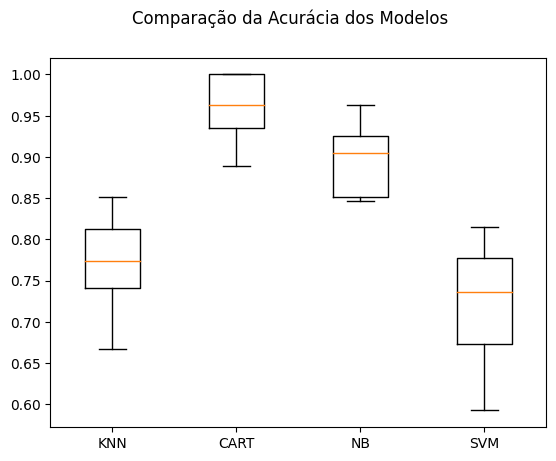

In [ ]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(7) 

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure() 
fig.suptitle('Comparação da Acurácia dos Modelos') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

In [ ]:
# Criando um modelo com todo o conjunto de treino
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test) 

# Estimando a acurácia no conjunto de teste
print(accuracy_score(y_test, predictions))

0.9850746268656716


In [ ]:
print(predictions)

[2. 2. 0. 0. 2. 1. 0. 0. 2. 0. 2. 2. 1. 2. 0. 0. 1. 0. 2. 0. 2. 2. 2. 0.
 2. 1. 2. 2. 0. 1. 0. 2. 0. 2. 0. 0. 2. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0.
 0. 2. 0. 2. 2. 1. 2. 2. 0. 0. 0. 1. 2. 1. 0. 2. 1. 1. 0.]
